In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv("datasets/autentykacja_eeg.csv", sep=";")

In [63]:
df.head()

,Delta,Theta,Alpha_low,Alpha_high,Beta_low,Beta_high,Gamma_low,Gamma_high,Attention,Meditation,BlinkStrength,Flag
0,785389,114375,57106,37625,24464,17104,15846,8024,45,91,15,1
1,386949,80792,23506,22118,9566,7147,5392,1697,8,42,6,0
2,21453,14085,4756,5062,2176,2117,2867,862,48,66,9,1
3,322637,56936,17810,25793,15870,8050,3621,2100,25,69,8,0
4,19412,12985,6416,6131,7126,7419,2677,1884,80,53,-1,1


In [64]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [65]:
def classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    neighbors = np.arange(1, 9)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        train_accuracy[i] = knn.score(X_train_scaled, y_train)
        test_accuracy[i] = knn.score(X_test_scaled, y_test)
    
    plt.title('Accuracy of different number of neighbors')
    plt.plot(neighbors, test_accuracy, label='Testing accuracy')
    plt.plot(neighbors, train_accuracy, label='Train accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

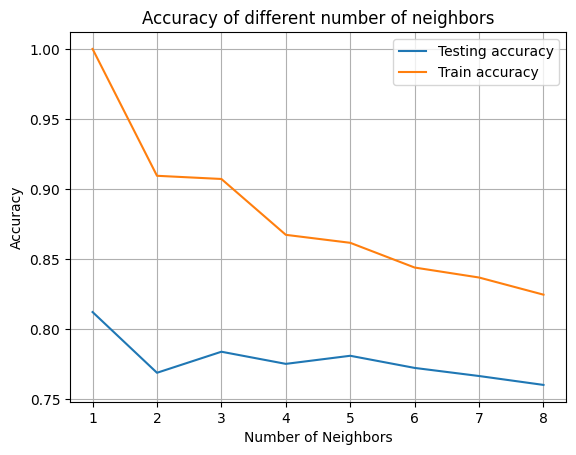

In [66]:
X = df[df.columns[:-1]]
y = df["Flag"]

classification(X, y)

Why do we want to show training accuracy also?

<hr>
<h4>Now, the exact same process but with deleting outliers first</h4>

In [79]:
no_outliers_df = df
for col in (no_outliers_df.columns[:-1]):
    upper = df[col].quantile(0.98)
    no_outliers_df = no_outliers_df[no_outliers_df[col] < upper]

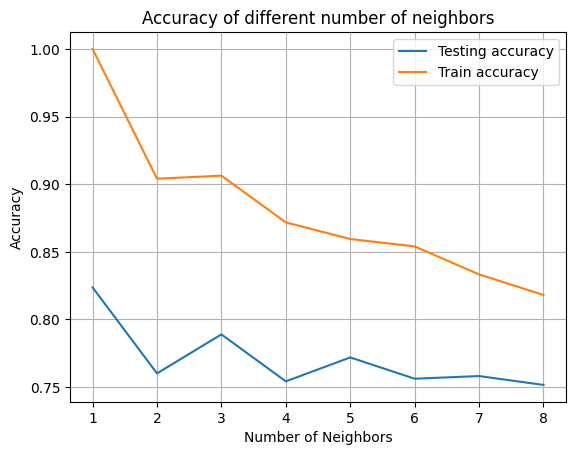

In [80]:
X = no_outliers_df[no_outliers_df.columns[:-1]]
y = no_outliers_df["Flag"]

classification(X, y)

We can observe slight improvement in accuracy with lower number of neighbors <br>
And slight disimprovement with higher number of neighbors